<a href="https://colab.research.google.com/github/krislars/hydrogen/blob/master/Hydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hydrogen Atom

Kristen Larson, Western Washington University 

In [0]:
# You may want to comment this line out if running on your own system
!pip install sympy==1.3

    100% |████████████████████████████████| 5.9MB 998kB/s 
  Stored in directory: /root/.cache/pip/wheels/6c/59/86/478e3c0f298368c119095cc5985dedac57c0e35a85c737f823
Successfully built sympy
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


In [0]:
from sympy import Symbol,integrate,conjugate,plot,diff,solve,sin,oo,pi
from sympy.physics.hydrogen import R_nl,Psi_nlm,Ynm

In [0]:
r=Symbol("r", real=True, positive=True)
phi=Symbol("phi", real=True)
theta=Symbol("theta", real=True)

## Radial Part, R_nl(r)

Using Sympy (Symbolic Python, like Mathematica), we can access the hydrogen wavefunctions directly.  Let's start with the radial part, R_nl(r).  Here are some cool things that you can do.
1. Print out the wavefunction

In [16]:
R_nl(2,0,r) 

sqrt(2)*(-r + 2)*exp(-r/2)/4

2. Integrate the wavefunction.  

The function below is the probability density integrated over all radii.  How would you change it to be an expectation value?  Try it!  Notice that if you are expecting a radius, the answer is reported as a multiple of the Bohr radius.

In [27]:
integrate(R_nl(2, 0, r)**2 * r**2, (r, 0, oo))

1

3.  Plot the wavefunction

Again, the plot below is the probability density.  How would you change it to the wavefunction?

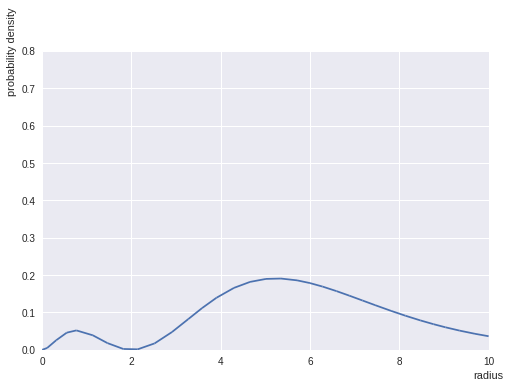

In [18]:
p1 = plot(R_nl(2, 0, r)**2 * r**2, xlim=[0,10], ylim=[0,0.8], 
          xlabel='radius', ylabel='probability density')

4.  Differentiate the wavefunction.

Here we differentiate the probability density and set that equal to zero to find the maxima.  Guess what the answer is from the plot above, and then check your understanding below.

In [23]:
diff(R_nl(2, 0, r)**2 * r**2)

-r**2*(-r + 2)**2*exp(-r)/8 + r**2*(2*r - 4)*exp(-r)/8 + r*(-r + 2)**2*exp(-r)/4

In [26]:
solve(diff(R_nl(2, 0, r)**2 * r**2), r)

[2, -sqrt(5) + 3, sqrt(5) + 3]

In [31]:
zeros=solve(diff(R_nl(2, 0, r)**2 * r**2), r)
zeros[1].evalf(3),zeros[2].evalf(3)

(0.764, 5.24)

Notice that you don't have to use just the radial part for these exercises!  Here is the same plot with the whole wavefunction, $\psi_{nlm}(r,\theta,\phi)$.

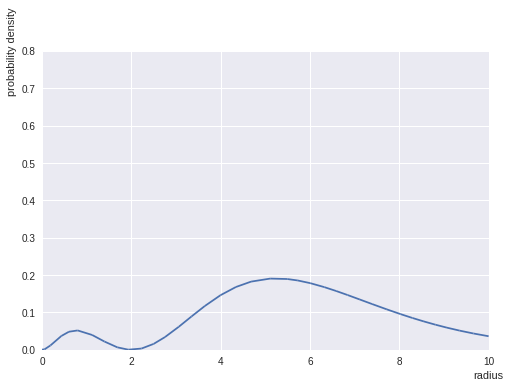

In [32]:
p2 = plot(Psi_nlm(2,0,0,r,phi=0,theta=0,Z=1)**2 * 4 * pi * r**2,
          xlim=[0,10], ylim=[0,0.8], xlabel='radius', ylabel='probability density')